   # Product Sales Effectiveness

## *Business Case:* 
 **- Based on given feature we need to predict the lead category of customer [ High potential, Low potential ].**


### Project Details
- FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. 
- FicZon major leads generation channel is digital and through their website.
- FicZon business is majorly dependent on the sales force effectiveness.
- As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.
- Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff.
- FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

### Domain Analysis
- **Created :** This is unique feature in data tell about activity related to the selling and no of goods sold in certain date as well as time.

- **Product ID :** ID Given to the product for specific identification.

- **Source :** Coustmer search through which source like website,Campaign,call,etc.

- **Mobile :** Mobile number of customer. 

- **Email :** Email id of customer.

- **Sales_Agent :** Sales agent is a person or a company that acts as a sales agent on behalf of the exporting company ( principal ), introducing its products to potential buyers in the external market, in exchange for a commission based on the value of the business deals arranged and paid to the principal.

- **Location :** This column contains different location.

- **Delivery_Mode :** The Delivery mode of products.

- **Status :** Status is the Target veriable , This tells about the category of customer [ High Potential, Low potential]

#### Target variable == Status [High Potential, Low potential]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data.csv")
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## Basic Checks

In [3]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [4]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [6]:
data.describe(include="O").T

,count,unique,top,freq
Created,7422,6752,26-09-2018 11:30,4
Source,7405,25,Call,2547
Mobile,5612,486,XXXXXXX,222
EMAIL,7422,883,#VALUE!,1701
Sales_Agent,7399,12,Sales-Agent-4,1500
Location,7364,17,Other Locations,2500
Delivery_Mode,7422,5,Mode-5,2975
Status,7422,11,Junk Lead,1536


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,7364.0,15.947311,6.072937,0.0,12.0,18.0,19.0,28.0


In [8]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [9]:
data.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [10]:
data.isna().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [11]:
data.Product_ID.value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [12]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:
for i in data.columns:
    print("********************")
    print(i,data[i].unique())
    print(data[i].value_counts())
    

********************
Created ['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21' ...
 '28-04-2018 09:20' '28-04-2018 08:04' '28-04-2018 07:54']
Created
26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 12:52    1
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
28-04-2018 07:54    1
Name: count, Length: 6752, dtype: int64
********************
Product_ID [nan  9. 19. 18. 15. 27.  5.  2.  3. 25. 10. 20. 11. 21.  1. 12. 13. 17.
 24. 26. 16. 23. 22.  8. 14.  6.  0. 28.  7.  4.]
Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtyp

- Data contains missing values.
- Created,Mobile,EMAIL this columns contains **Unique values.**
- So we delete this columns.

In [14]:
data.drop(["Created","Mobile","EMAIL"],axis=1,inplace=True)


In [15]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## EDA

In [16]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [17]:
data.Product_ID.value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

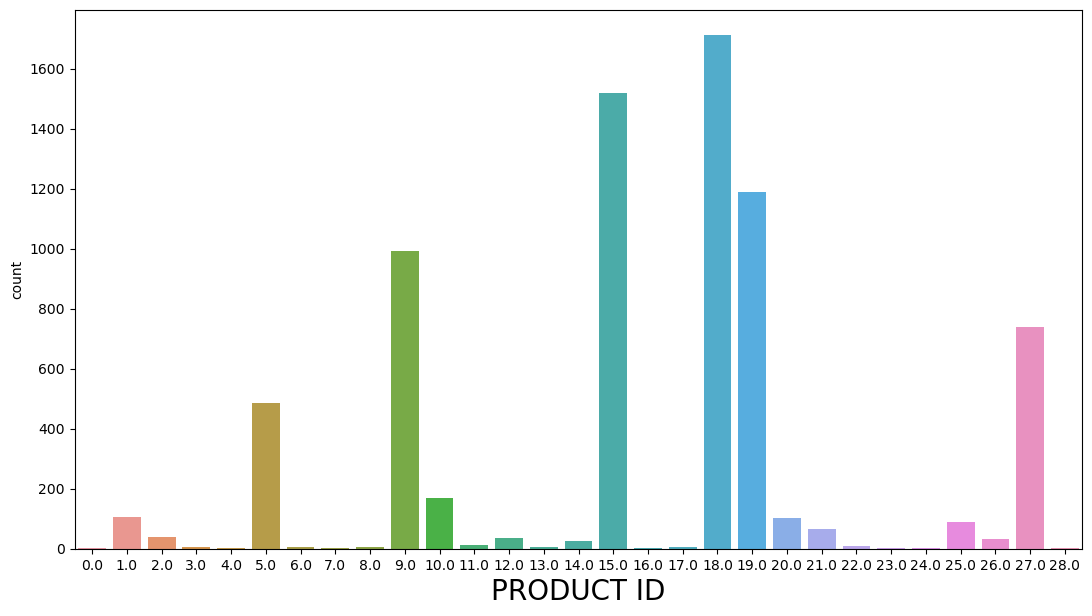

In [18]:
plt.figure(figsize=(13,7))
sns.countplot(x=data.Product_ID)
plt.xlabel('PRODUCT ID',fontsize=20)
plt.show()


- sales of product having product ID 18.0,15.0,19.0,9.0,27.0 & 5.0 is more than other products.
- Other product having less sales.

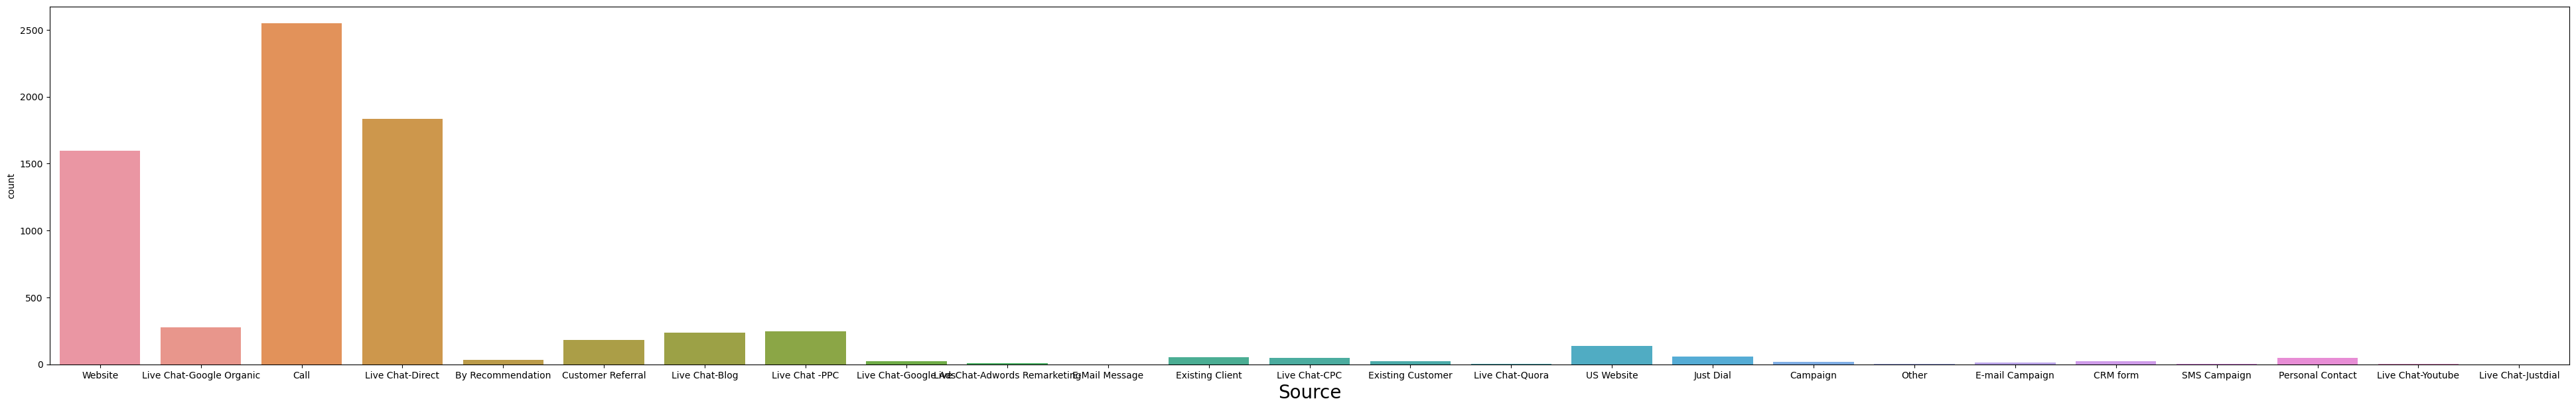

In [19]:
plt.figure(figsize=(49,7))
sns.countplot(x=data.Source)
plt.xlabel('Source',fontsize=20)
plt.show()

- Most of the sales has a Call, Live Chat-Direct & Website.
- All others sources having less than 280.

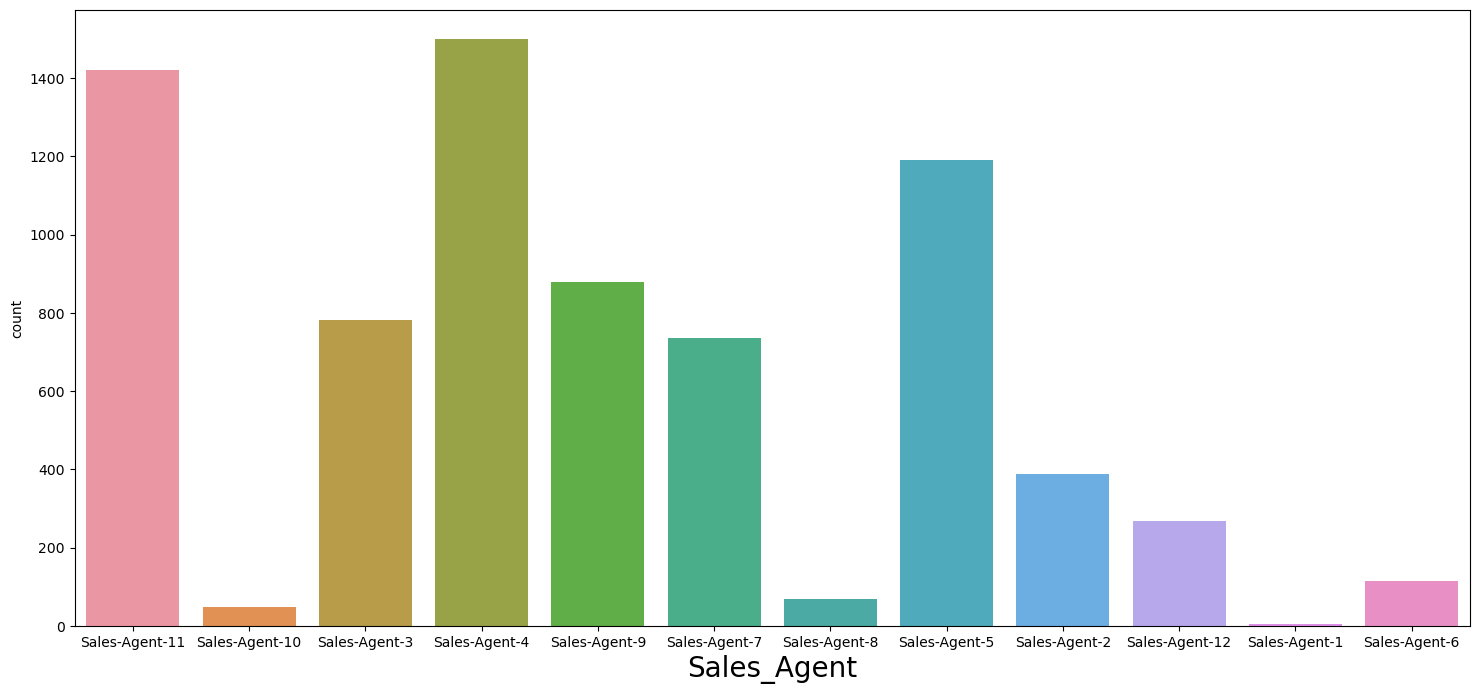

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x=data.Sales_Agent)
plt.xlabel("Sales_Agent",fontsize=20)
plt.show()

- Agent 4, 11 and  5 done more sales then others.
- Agent 9,7 and 3 done sales in between 650-850.
- All other agent doing less sales.

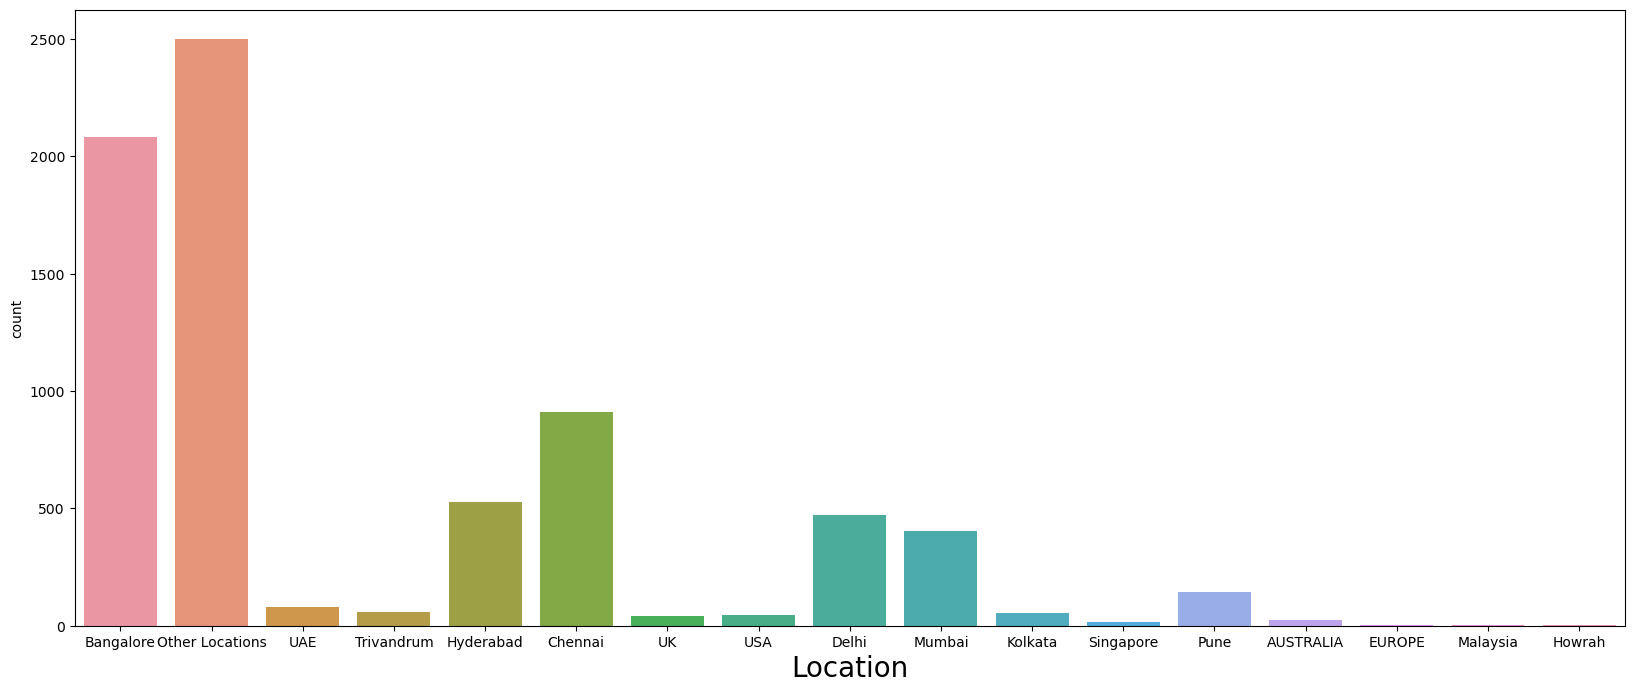

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(x="Location",data=data)
plt.xlabel("Location",fontsize=20)
plt.show()

- Bangalore and Other location has more sales then other.
- Chenni,Hydrabad,Delhi,Mumbai has less sales than bangalore and other location.
- Other remeining locations having extremely less sales.

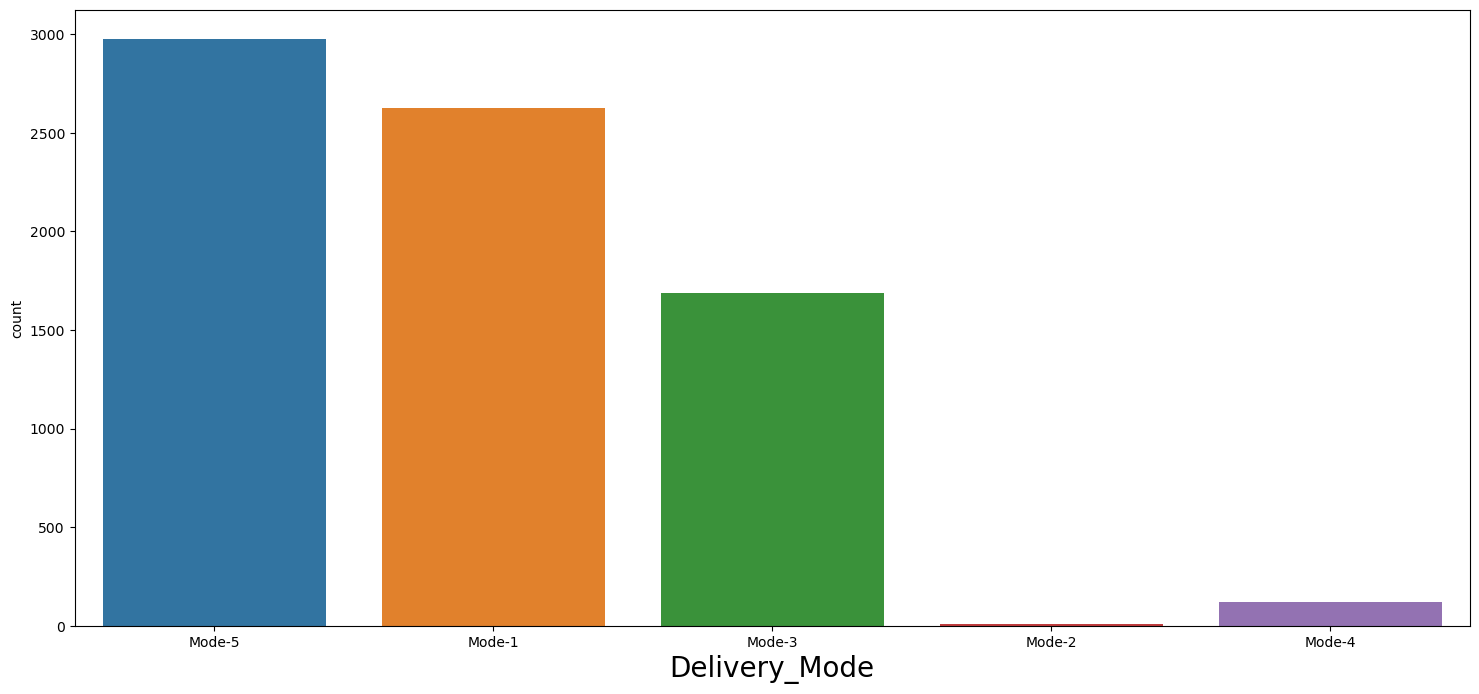

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(x="Delivery_Mode",data=data)
plt.xlabel("Delivery_Mode",fontsize=20)
plt.show()

- Here is the total 5 Delivey mode.
- 5,1,3 delivery mode having more sales.
- 2 and 4 having extremely less sales.

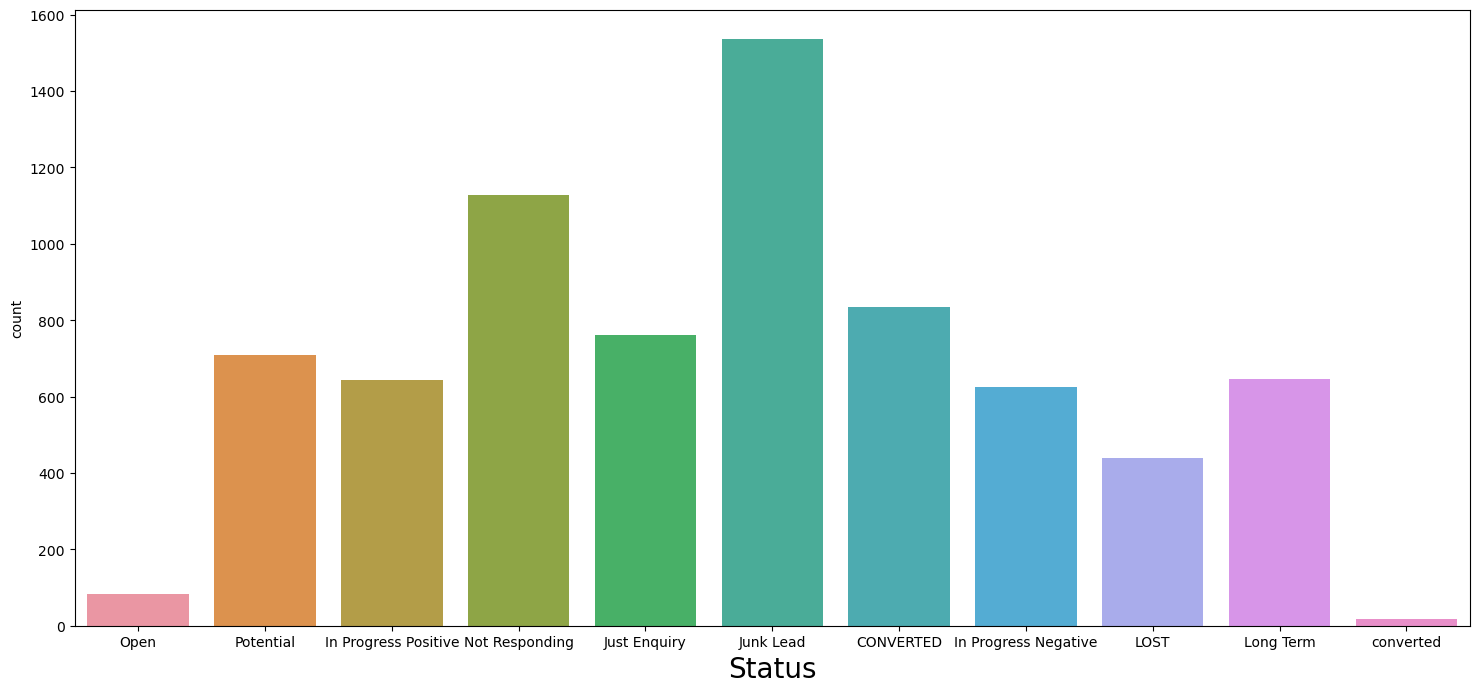

In [23]:
plt.figure(figsize=(18,8))
sns.countplot(x="Status",data=data)
plt.xlabel("Status",fontsize=20)
plt.show()

## Data preprocessing/Feature Engineering

In [24]:
data.isna().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

- In dataset 4 features of table contains missing values.

In [25]:
data.Product_ID.value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [26]:
# We use mode for imputing missing values in product_ID columns.
data.Product_ID.mode()

0    18.0
Name: Product_ID, dtype: float64

In [27]:
data.loc[data["Product_ID"].isna()==True,"Product_ID"]= 18.0

In [28]:
data.Source.value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [29]:
data.Source.mode()

0    Call
Name: Source, dtype: object

In [30]:
data.loc[data["Source"].isna()==True,"Source"] = "Call"

In [31]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18.0,Website,Sales-Agent-11,NaN,Mode-5,Open
1,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
2,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
3,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
4,18.0,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [32]:
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [33]:
data.Sales_Agent.mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [34]:
data.loc[data["Sales_Agent"].isna()==True,"Sales_Agent"] = "Sales-Agent-4"

In [35]:
data.Location.value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [36]:
data.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [37]:
data.loc[data["Location"].isna()==True,"Location"] = "Other Locations"

## Features contains lots off differnt labels so we compress and merge the label.

#### Product_ID

In [38]:
data.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [39]:
data.Product_ID.value_counts()

Product_ID
18.0    1769
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [40]:
# In this feature 14 product ID has been less sold so we replace it with minimum sold
data.Product_ID.replace([11.0,22.0,3.0,17.0,6.0,8.0,13.0,24.0,16.0,23.0,0.0,28.0,7.0,4.0],"minimum sold",inplace=True)

#### Source

In [41]:
data.Source.value_counts()

Source
Call                             2564
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [42]:
# we make groups and put similar labels in one group like [(Live ChatDirect,Live ChatGoogle Organic,Live Chat PPC)--> live chats]

# Group 1 [Live chat]
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-CPC',
                    'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube',
                    'Live Chat-Justdial'],'live chat',inplace=True)

In [43]:
## Group 2 [new client]

data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'new client',inplace=True)

In [44]:
# Group 3 [social]
data.Source.replace(['US Website','Just Dial'],'social',inplace=True)

In [45]:
# Group 4 [recommendation]
data.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

In [46]:
# Group 5 [campaign]
data.Source.replace(['Campaign','E-mail Campaign','SMS Campaign','E-Mail Message'],'campaign',inplace=True)

In [47]:
# others having only 2 entries so we merge it into campaign column
data.Source.replace(["Other"],"campaign",inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7422 non-null   object
 1   Source         7422 non-null   object
 2   Sales_Agent    7422 non-null   object
 3   Location       7422 non-null   object
 4   Delivery_Mode  7422 non-null   object
 5   Status         7422 non-null   object
dtypes: object(6)
memory usage: 348.0+ KB


In [49]:
data.Source.value_counts()

Source
live chat         2677
Call              2564
Website           1594
recommendation     212
social             193
new client         146
campaign            36
Name: count, dtype: int64

#### Sales_Agent

In [50]:
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

#### Location

In [51]:
data.Location.value_counts()

Location
Other Locations    2558
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [52]:
data.Location.value_counts()/len(data) * 100

Location
Other Locations    34.465104
Bangalore          28.078685
Chennai            12.247373
Hyderabad           7.113985
Delhi               6.345998
Mumbai              5.416330
Pune                1.913231
UAE                 1.064403
Trivandrum          0.781461
Kolkata             0.741040
USA                 0.606306
UK                  0.552412
AUSTRALIA           0.336836
Singapore           0.229049
Malaysia            0.053894
EUROPE              0.040420
Howrah              0.013473
Name: count, dtype: float64

In [53]:
# Some locations having less than 0.05% of sales so we merged it into Other Location columns.
data.Location.replace(["Howrah","EUROPE","Malaysia","Singapore","AUSTRALIA"],"Other Locations",inplace=True)

#### Delivery_Mode

In [54]:
data.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [55]:
data.Delivery_Mode.value_counts()/len(data) * 100

Delivery_Mode
Mode-5    40.083535
Mode-1    35.394772
Mode-3    22.743196
Mode-4     1.630288
Mode-2     0.148208
Name: count, dtype: float64

In [56]:
# Mode-5 and Mode-2 having very less number of sales so we merged it into Mode-5
data.Delivery_Mode.replace(["Mode-2","Mode-4"],"Mode-5",inplace=True)

#### Status

In [57]:
data.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [58]:
# Status having many different attributes so we merged it into low potential and High potential.

data.Status.replace(["Junk Lead","Not Responding","Just Enquiry","In Progress Negative","LOST"],"Low potential",inplace=True)

data.Status.replace(["CONVERTED","Potential","Long Term","In Progress Positive","Open","converted"],"High potential",inplace=True)

In [59]:
data.describe()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7422.0,7422,7422,7422,7422,7422
unique,16.0,7,12,12,3,2
top,18.0,live chat,Sales-Agent-4,Other Locations,Mode-5,Low potential
freq,1769.0,2677,1523,2608,3107,4491


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7422 non-null   object
 1   Source         7422 non-null   object
 2   Sales_Agent    7422 non-null   object
 3   Location       7422 non-null   object
 4   Delivery_Mode  7422 non-null   object
 5   Status         7422 non-null   object
dtypes: object(6)
memory usage: 348.0+ KB


## Encoding

#### Poduct_ID

In [61]:
data.Product_ID.value_counts()

Product_ID
18.0            1769
15.0            1518
19.0            1189
9.0              992
27.0             739
5.0              487
10.0             168
1.0              105
20.0             102
25.0              90
21.0              66
minimum sold      65
2.0               38
12.0              36
26.0              31
14.0              27
Name: count, dtype: int64

In [62]:
data.loc[data["Product_ID"]=="minimum sold", "Product_ID"]= 0.0

In [63]:
data['Product_ID']=data['Product_ID'].astype('int64') 

#### Source

In [64]:
data.Source.value_counts()

Source
live chat         2677
Call              2564
Website           1594
recommendation     212
social             193
new client         146
campaign            36
Name: count, dtype: int64

In [65]:
# Here we do frequency encoding
data.loc[data["Source"]=="campaign","Source"] = 0
data.loc[data["Source"]=="new client","Source"] = 1
data.loc[data["Source"]=="social","Source"] = 2
data.loc[data["Source"]=="recommendation","Source"] = 3
data.loc[data["Source"]=="Website", "Source"] = 4
data.loc[data["Source"]=="Call","Source"] = 5
data.loc[data["Source"]=="live chat","Source"] = 5


In [66]:
data['Source']=data['Source'].astype('int64') 

In [67]:
data.Source.value_counts()

Source
5    5241
4    1594
3     212
2     193
1     146
0      36
Name: count, dtype: int64

#### Sales_Agent

In [68]:
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [69]:
data.loc[data["Sales_Agent"]=="Sales-Agent-1","Sales_Agent"] = 0
data.loc[data["Sales_Agent"]=="Sales-Agent-10","Sales_Agent"] = 0
data.loc[data["Sales_Agent"]=="Sales-Agent-8","Sales_Agent"] = 0
data.loc[data["Sales_Agent"]=="Sales-Agent-6","Sales_Agent"] = 1
data.loc[data["Sales_Agent"]=="Sales-Agent-12","Sales_Agent"] = 2
data.loc[data["Sales_Agent"]=="Sales-Agent-2","Sales_Agent"] = 3
data.loc[data["Sales_Agent"]=="Sales-Agent-7","Sales_Agent"] = 4
data.loc[data["Sales_Agent"]=="Sales-Agent-3","Sales_Agent"] = 5
data.loc[data["Sales_Agent"]=="Sales-Agent-9","Sales_Agent"] = 6
data.loc[data["Sales_Agent"]=="Sales-Agent-5","Sales_Agent"] = 7
data.loc[data["Sales_Agent"]=="Sales-Agent-11","Sales_Agent"] = 8
data.loc[data["Sales_Agent"]=="Sales-Agent-4","Sales_Agent"] = 9

In [70]:
data["Sales_Agent"]=data["Sales_Agent"].astype("int64")

In [71]:
data.Sales_Agent.value_counts()

Sales_Agent
9    1523
8    1420
7    1190
6     879
5     781
4     736
3     389
2     269
0     121
1     114
Name: count, dtype: int64

#### Location

In [72]:
data.Location.value_counts()

Location
Other Locations    2608
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
Name: count, dtype: int64

In [73]:
data.loc[data["Location"]=="Other Locations","Location"] = 11
data.loc[data["Location"]=="Bangalore","Location"] = 10
data.loc[data["Location"]=="Chennai","Location"] = 9
data.loc[data["Location"]=="Hyderabad","Location"] = 8
data.loc[data["Location"]=="Delhi","Location"] = 7
data.loc[data["Location"]=="Mumbai","Location"] = 6
data.loc[data["Location"]=="Pune","Location"] = 5
data.loc[data["Location"]=="UAE","Location"] = 4
data.loc[data["Location"]=="Trivandrum","Location"] = 3
data.loc[data["Location"]=="Kolkata","Location"] = 2
data.loc[data["Location"]=="USA","Location"] = 1
data.loc[data["Location"]=="UK","Location"] = 0

In [74]:
data["Location"]=data["Location"].astype("int64")

#### Delivery_Mode

In [75]:
data.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    3107
Mode-1    2627
Mode-3    1688
Name: count, dtype: int64

In [76]:
data.loc[data["Delivery_Mode"]=="Mode-3", "Delivery_Mode"] = 0
data.loc[data["Delivery_Mode"]=="Mode-1", "Delivery_Mode"] = 1
data.loc[data["Delivery_Mode"]=="Mode-5", "Delivery_Mode"] = 2

In [77]:
data["Delivery_Mode"]=data["Delivery_Mode"].astype("int64")

#### Status

In [78]:
data.Status.value_counts()

Status
Low potential     4491
High potential    2931
Name: count, dtype: int64

In [79]:
data.loc[data["Status"]=="Low potential","Status"] = 0
data.loc[data["Status"]=="High potential","Status"] = 1

In [80]:
data["Status"]=data["Status"].astype("int64")

### CHECKING CORRELATION

In [81]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,-0.029079,0.010641,-0.019252,-0.053394,0.090575
Source,-0.029079,1.000000,0.023654,-0.073949,0.026841,-0.076006
Sales_Agent,0.010641,0.023654,1.000000,-0.122447,0.055520,-0.085049
Location,-0.019252,-0.073949,-0.122447,1.000000,0.181727,-0.055240
Delivery_Mode,-0.053394,0.026841,0.055520,0.181727,1.000000,-0.131466
Status,0.090575,-0.076006,-0.085049,-0.055240,-0.131466,1.000000


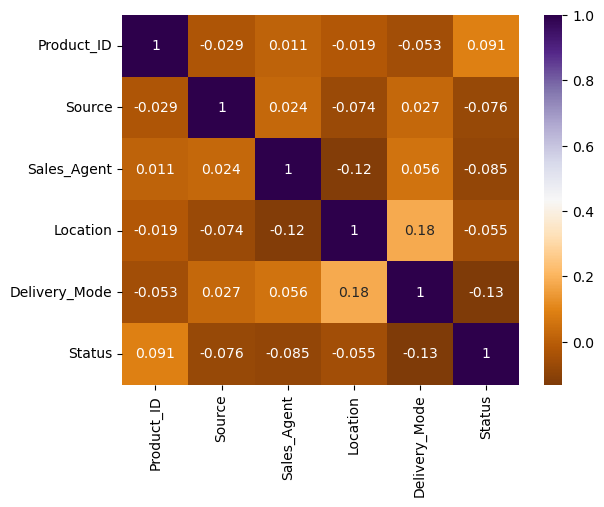

In [82]:
sns.heatmap(data.corr(),annot=True,cmap='PuOr')
plt.show()

- No highly correlated features are available.

## MODEL CREATION

- #### HERE WE WILL BE EXPERIMENTING WITH SEVEN ALGORITHM 

1. Logistic regression.
2. KNeighbourClassifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Grediant Boosting Classifier
6. XGB classifier
7. Artifical neural network


In [83]:
data.Status.value_counts()

Status
0    4491
1    2931
Name: count, dtype: int64

In [84]:
x=data.drop("Status",axis=1)
y=data.Status

### Balancing Target variable

In [85]:
y.value_counts()

Status
0    4491
1    2931
Name: count, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [87]:
y_sm.value_counts()

Status
1    4491
0    4491
Name: count, dtype: int64

### Split Training and testing data

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

## 1.Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=4)
log_reg.fit(x_train,y_train)
log_test_predict=log_reg.predict(x_test)
log_train_predict=log_reg.predict(x_train)

### Evaluation

#### Training Accuracy

In [90]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic Regrssion model = ",log_train_accuracy*100)
Log_train=log_train_accuracy*100
print("Logistic Regression Training classification report= \n",classification_report(log_train_predict,y_train))
log_train_accuracy

Training accuracy of Logistic Regrssion model =  60.33350176856999
Logistic Regression Training classification report= 
               precision    recall  f1-score   support

           0       0.89      0.62      0.73      5202
           1       0.15      0.47      0.23       735

    accuracy                           0.60      5937
   macro avg       0.52      0.55      0.48      5937
weighted avg       0.80      0.60      0.67      5937



0.6033350176856999

#### Test Accuracy

In [91]:
log_test_accuracy=accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic Regreesion = ",log_test_accuracy*100)
Log_test=log_test_accuracy*100
print("Logistic Regression Testing Accuracy report = \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic Regreesion =  60.13468013468013
Logistic Regression Testing Accuracy report = 
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      1310
           1       0.16      0.56      0.25       175

    accuracy                           0.60      1485
   macro avg       0.54      0.58      0.49      1485
weighted avg       0.82      0.60      0.67      1485



## 2. KNeighboursClassifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_knn_predict = knn.predict(x_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.3212121212121212, 0.33131313131313134, 0.3151515151515151, 0.3164983164983165, 0.32525252525252524, 0.30976430976430974, 0.3138047138047138, 0.30707070707070705, 0.3090909090909091]


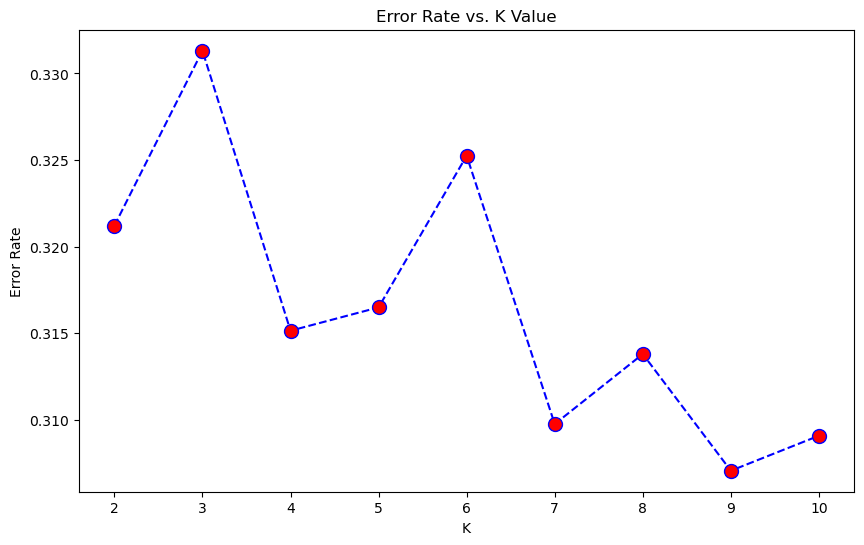

In [93]:
# Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [94]:
# Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=4)

knn1.fit(x_train,y_train)

knn_test_predict = knn1.predict(x_test)

knn_train_predict = knn1.predict(x_train)


### Evaluation

#### Training Accuracy

In [95]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
knn_train=knn_train_accuracy*100
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  76.01482230082533
Training classification report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      4353
           1       0.53      0.78      0.64      1584

    accuracy                           0.76      5937
   macro avg       0.72      0.77      0.73      5937
weighted avg       0.81      0.76      0.77      5937



#### Testing Accuracy

In [96]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
knn_test=print("Testing accuracy of knn model",knn_test_accuracy*100)
knn_test=knn_test_accuracy*100
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 68.48484848484848
Testing classification report: 
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       872
           1       0.68      0.45      0.54       613

    accuracy                           0.68      1485
   macro avg       0.68      0.65      0.65      1485
weighted avg       0.68      0.68      0.67      1485



### USE BAGGING ON KNEIGHBOURS CLASSIFIER

In [97]:
# Create a K-neighbour classifier object
knn1 = KNeighborsClassifier(n_neighbors=3)

from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=knn1,n_estimators=50)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

bagg.fit(x_train,y_train)

bagg_predict = bagg.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Evaluation

In [98]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)
bgg_acc=bagg_accuracy*100

Score after bagging: 69.15824915824916


## 3.Decision Tree 

In [99]:
# Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

dtc_test_predict = dtc.predict(x_test)

dtc_train_predict = dtc.predict(x_train)

#### Training Accuracy

In [100]:
dtc_train_accuracy = accuracy_score(y_train,dtc_train_predict)
Dec_train=print("Training accuracy of Decision tree classifier:",dtc_train_accuracy*100)
Dec_train=dtc_train_accuracy*100
print("classification report of training:"'\n',classification_report(y_train,dtc_train_predict))

Training accuracy of Decision tree classifier: 81.9774296782887
classification report of training:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      3619
           1       0.82      0.69      0.75      2318

    accuracy                           0.82      5937
   macro avg       0.82      0.80      0.80      5937
weighted avg       0.82      0.82      0.82      5937



#### Testing Accuracy

In [101]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
Dec_test=print("Training accuracy of Decision tree classifier:",dtc_test_accuracy*100)
Dec_test=dtc_test_accuracy*100
print("classification report of training:"'\n',classification_report(y_test,dtc_test_predict))

Training accuracy of Decision tree classifier: 69.6969696969697
classification report of training:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76       872
           1       0.66      0.55      0.60       613

    accuracy                           0.70      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.69      0.70      0.69      1485



#### HYPER PARAMETER TUNING

In [102]:
# Step:1 importing library
from sklearn.model_selection import GridSearchCV

# Step:2 Tunning the parameter
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 30))), 
    "min_samples_split":[2, 3, 4,5], 
    "min_samples_leaf":list(range(1, 10)), 
}


tree_c = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_c, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting traning data
tree_cv.fit(x_train,y_train)

# Get the best parameter
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")



Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [103]:
# Step:3 place the parameter on decision tree classifier
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=13,min_samples_leaf=1,
                           min_samples_split=2,splitter='best')

In [104]:
# Step:4 fitting training data
dt1.fit(x_train,y_train)

# Step:5 prdiction on testing data
yhat = dt1.predict(x_test)


#### EVALUATION

In [105]:
dt1_test_accuracy = accuracy_score(y_test,yhat)
print("Accuracy score:",dt1_test_accuracy*100)
DT_tuning=dt1_test_accuracy*100
print("Classification report:"'\n',classification_report(y_test,yhat))

Accuracy score: 70.23569023569024
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       872
           1       0.67      0.54      0.60       613

    accuracy                           0.70      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.70      0.70      0.70      1485



## 4.Random Forest Classifier

In [106]:
# import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# fitting the training data
rf.fit(x_train,y_train)

# Prediction on test data
rf_test_predict = rf.predict(x_test)

# Prediction on training data
rf_train_predict = rf.predict(x_train)

### Evaluation

#### Training Accuracy

In [107]:
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
Ran_train=rf_train_accuracy*100
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))


Training accuracy of random forest classifier: 81.9774296782887
Classification report of training:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      3619
           1       0.78      0.75      0.76      2318

    accuracy                           0.82      5937
   macro avg       0.81      0.81      0.81      5937
weighted avg       0.82      0.82      0.82      5937



#### Testing Accuracy

In [108]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
Ran_test=print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
Ran_test=rf_test_accuracy*100
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 70.9090909090909
Classification report of training:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       872
           1       0.66      0.60      0.63       613

    accuracy                           0.71      1485
   macro avg       0.70      0.69      0.69      1485
weighted avg       0.71      0.71      0.71      1485



#### HYPER PARAMETER TUNNING

In [109]:
# Step:1 [imutation of parameter]
from sklearn.model_selection import RandomizedSearchCV
# not used grid search cv beacuse memory reason

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt'] ### auto - select randomly, sqrt - 
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] ### level in the tree
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]


# Step:2 make a dictionary of parameter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf1 = RandomForestClassifier(random_state=42) 
# provide random state beacuse select row and column randomly


# Step:4 randomized search cv with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)


# Step:5 fitting the training data
rf_cv.fit(x_train, y_train)

# Step:6 Getting the best parameter
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

Best paramters: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 76})


In [110]:
# Step:7 
rf_clf2 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf2.fit(x_train,y_train)

# Step:9 Prediction on test data
y_predict = rf_clf2.predict(x_test)


### Evaluation

In [111]:
test_accuracy = accuracy_score(y_test,y_predict)
print("Testing accuracy after hyper parameter tunning:",test_accuracy*100)
Ran_tuning=test_accuracy*100

Testing accuracy after hyper parameter tunning: 70.23569023569024


## 5.Geadient Boosting Classifier

In [112]:
# Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gbm.fit(x_train,y_train) ## fitting the data

# Step:3 prediction on test data
gbm_test_predict=gbm.predict(x_test)

# Step:4 Prediction on train data
gbm_train_predict = gbm.predict(x_train)


### Evaluation

#### Training Accuracy

In [113]:
gbm_train_accuracy = accuracy_score(y_train,gbm_train_predict)
GBC_train=print("Grediant boosting classifier training accuracy:",gbm_train_accuracy*100)
GBC_train=gbm_train_accuracy*100
print("Classification report of training:"'\n',classification_report(y_train,gbm_train_predict))

Grediant boosting classifier training accuracy: 73.94306889001179
Classification report of training:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80      3619
           1       0.70      0.57      0.63      2318

    accuracy                           0.74      5937
   macro avg       0.73      0.71      0.72      5937
weighted avg       0.74      0.74      0.73      5937



#### Testing Accuracy

In [114]:
gbm_test_accuracy = accuracy_score(y_test,gbm_test_predict)
GBC_test=print("Grediant boosting classifier testing accuracy:",gbm_test_accuracy*100)
GBC_test=gbm_test_accuracy*100
print("Classification report of testing:"'\n',classification_report(y_test,gbm_test_predict))

Grediant boosting classifier testing accuracy: 70.57239057239057
Classification report of testing:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       872
           1       0.68      0.54      0.60       613

    accuracy                           0.71      1485
   macro avg       0.70      0.68      0.68      1485
weighted avg       0.70      0.71      0.70      1485



## 6.XGB Classifier

In [115]:
# import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Fitting the training data
xgb.fit(x_train,y_train)

# Prediction on training data
xgb_train_predict = xgb.predict(x_train)

# Prediction on testing data
xgb_test_predict = xgb.predict(x_test)

### Evaluation

#### Training Accuracy

In [116]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
XGB_train=print("Training accuracy of xgb model",xgb_train_accuracy*100)
XGB_train=xgb_train_accuracy*100
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 78.57503789792824
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      3839
           1       0.68      0.75      0.71      2098

    accuracy                           0.79      5937
   macro avg       0.77      0.78      0.77      5937
weighted avg       0.79      0.79      0.79      5937



#### Testing Accuracy

In [117]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
XGB_test=print("Testing accuracy of xgb model",xgb_test_accuracy*100)
XGB_test=xgb_test_accuracy*100
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 71.17845117845117
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.80      0.73      0.77       952
           1       0.59      0.67      0.63       533

    accuracy                           0.71      1485
   macro avg       0.69      0.70      0.70      1485
weighted avg       0.72      0.71      0.72      1485



#### HYPER PARAMETER TUNNING

In [118]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02,0.003, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [3,5,6,7,8,10],
              'n_estimators': [50,65,80,100,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=150,
                        cv=5,verbose=3,random_state=5,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:4 Fitting training data on randomized search cv
rcv.fit(x_train,y_train)

# Step:5 Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameter: {'reg_lambda': 0.4, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.7, 'gamma': 0.1}


In [119]:
# Step:6 Place the best parameter
XGB2 = XGBClassifier(reg_lambda=25.6,reg_alpha=0.8,n_estimators=150,max_depth=10,learning_rate=0.4,gamma=0.2)

# Step:7 Fitting the training data
XGB2.fit(x_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(x_test)

In [120]:
XGB_accuracy = accuracy_score(XGB_prediction,y_test)
print("Accuracy score after hyperparameter tunning",XGB_accuracy*100)
XGB_tuning=XGB_accuracy*100
print("Classification report: \n",classification_report(XGB_prediction,y_test))


Accuracy score after hyperparameter tunning 71.58249158249158
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       986
           1       0.56      0.69      0.62       499

    accuracy                           0.72      1485
   macro avg       0.69      0.71      0.70      1485
weighted avg       0.74      0.72      0.72      1485



## 7.Artifial Neural Network

In [121]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

# Step:2 Fitting the training data
model.fit(x_train,y_train)



MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [122]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(x_test)
mlp_prdict_probability

array([[0.94120913, 0.05879087],
       [0.46220677, 0.53779323],
       [0.94645936, 0.05354064],
       ...,
       [0.57203358, 0.42796642],
       [0.50745164, 0.49254836],
       [0.48665654, 0.51334346]])

In [123]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(x_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(x_train)

### Evaluation

#### Training Accuracy

In [124]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
ANN_train=print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
ANN_train=mlp_train_accuracy*100
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 69.02475997978777
Classification report of training:
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      4546
           1       0.40      0.67      0.50      1391

    accuracy                           0.69      5937
   macro avg       0.64      0.68      0.64      5937
weighted avg       0.76      0.69      0.71      5937



#### Testing Accuracy

In [125]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
ANN_test=print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
ANN_test=mlp_test_accuracy*100
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 67.13804713804714
Classification report of testing:
               precision    recall  f1-score   support

           0       0.86      0.67      0.76      1120
           1       0.40      0.67      0.50       365

    accuracy                           0.67      1485
   macro avg       0.63      0.67      0.63      1485
weighted avg       0.75      0.67      0.69      1485



# Conclusion

In [126]:
from tabulate import tabulate
data =[ ["Logistic regression",Log_train,Log_test, "NA"],
        ["KNeighbourClassifier",knn_train,knn_test,bgg_acc],
        ["Decision Tree Classifier",Dec_train,Dec_test,DT_tuning],
        ["Random Forest Classifier",Ran_train,Ran_test,Ran_tuning],
        ["Grediant Boosting Classifier",GBC_train,GBC_test,"NA"],
        ["XGB classifier",XGB_train,XGB_test,XGB_tuning],
        ["Artifical neural network",ANN_train,ANN_test,"NA"]  
]

head=["Alogrithms","Training Accuracy","Testing Accuracy", "    After Bagging or \n Hyper Parameter Tuning"]

print(tabulate(data,headers=head,tablefmt="grid"))

+------------------------------+---------------------+--------------------+---------------------------+
| Alogrithms                   |   Training Accuracy |   Testing Accuracy |     After Bagging or      |
|                              |                     |                    |  Hyper Parameter Tuning   |
+==============================+=====================+====================+===========================+
| Logistic regression          |             60.3335 |            60.1347 | NA                        |
+------------------------------+---------------------+--------------------+---------------------------+
| KNeighbourClassifier         |             76.0148 |            68.4848 | 69.15824915824916         |
+------------------------------+---------------------+--------------------+---------------------------+
| Decision Tree Classifier     |             81.9774 |            69.697  | 70.23569023569024         |
+------------------------------+---------------------+----------

- ### From above all model Im select XGB classifier beacuse this model perform well on training as well as testing side and low variance and low bias model.

### MODEL SAVING

In [127]:
# Model saving using pickel
import pickle

file = open("XGB_classifier_model.pkl","wb")

# Dump information on file
pickle.dump(gbm,file)